In [67]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from matplotlib.patches import Rectangle

In [68]:
stopsigns = glob.glob("stopsigns/*.jpg")
stopsigns = [cv2.imread(s, cv2.IMREAD_COLOR) for s in stopsigns]
print( "{} stop signs in dataset".format(len(stopsigns)))

22 stop signs in dataset


## Question

We have opened these images using OpenCV. What color format are these images in? BGR or RGB?

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

In [69]:
plt.imshow(stopsigns[0]);
# plt.show()

In [70]:
s = stopsigns[0]
b, g, r = cv2.split(s)

fig, ax = plt.subplots(ncols=3, nrows=2)
[a.axis('off') for a in ax.flatten()]
ax[0,0].imshow(b, cmap='Blues')
ax[0,1].imshow(g, cmap='Greens')
ax[0,2].imshow(r, cmap='Reds')
ax[1,0].imshow(b, cmap='gray')
ax[1,1].imshow(g, cmap='gray')
ax[1,2].imshow(r, cmap='gray')
fig.set_size_inches(15,7);
# plt.show()

## Exercise 1

Convert the first stop sign image from BGR to RGB (`cv2.cvtColor(YOUR_IMAGE, cv2.COLOR_BGR2RGB)`), to HSV, and to LAB. 

For each colorspace, visualize the three channels (you probably want to use the gray colormap to compare between the three color spaces).

Which colorspace isolates the stop sign the best?

In [71]:
# TODO
rgb_image = cv2.cvtColor(s, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(s, cv2.COLOR_BGR2HSV)
lab_image = cv2.cvtColor(s, cv2.COLOR_BGR2LAB)
fig, ax = plt.subplots(ncols = 2, nrows = 2)
[a.axis('off') for a in ax.flatten()]
ax[0,0].imshow(s, cmap = 'gray')
ax[0,1].imshow(rgb_image, cmap = 'gray')
ax[1,0].imshow(hsv_image, cmap = 'gray')
ax[1,1].imshow(lab_image, cmap = 'gray')
# plt.show()
#RGB and LAB isolates the stop sign the best

## A dataset of stop sign images

In [72]:
fig, ax = plt.subplots(nrows=len(stopsigns))
for (a,s) in zip(ax,stopsigns):
    a.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))
    a.axis('off')
    
fig.set_size_inches(10, 5 * len(stopsigns))


## Exercise 2

Choose 4 images from the above dataset and plot each separate color channel in RGB, HSV, and LAB

Coordinate with your teammates so that each team member chooses 4 different images. (e.g., person A chooses [0:3], person B chooses [4:7], or you can shuffle the order).

Together, your team will be processing 20 images from the above dataset. For the rest of this lab, you will be working independently on your 4 images, and you will compare your answers at the end of all the exercises.

Once you have selected your four images, revisit your answer in exercise 1. Is it the same for the other 4 images in your dataset?

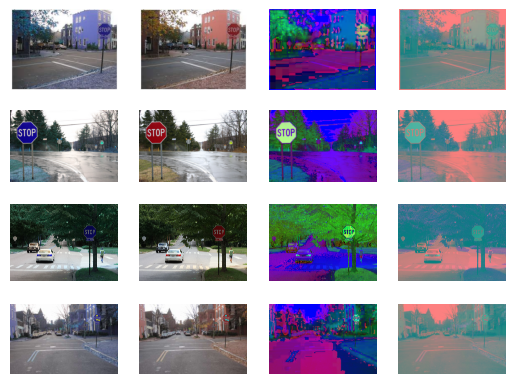

In [117]:
## TODO
chosen_images = stopsigns[4:8]
processed_images = []
for img in chosen_images:
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    processed_images.extend([img, rgb, hsv, lab])

fig, ax = plt.subplots(ncols = 4, nrows = 4)
# [a.axis('off') for a in ax.flatten()]
for a, im in zip(ax.flatten(), processed_images):
    a.axis('off')
    a.imshow(im, cmap = 'gray')
plt.show()

# Exercise 3

Filter the H (*Hue*) channel of the first image. Find the range of blue values that include as much of the sky as possible.

Use http://colorizer.org/ to find the values in Hue that correspond to blue.

However, note that OpenCV does not allow Hue to extend all the way up to 360 degrees. Why?

See this answer: https://stackoverflow.com/questions/16685707/why-is-the-range-of-hue-0-180-in-opencv

An 8-bit value can only hold values from 0 to 255.

Therefore, in OpenCV, Hue values are between 0 and 180 (the values from colorizer are divided by 2)

To filter, use the `cv2.inRange` function. See the following tutorial:

https://docs.opencv.org/3.4.1/df/d9d/tutorial_py_colorspaces.html


In [74]:
## TODO
hsv_image = cv2.cvtColor(s, cv2.COLOR_BGR2HSV)
sky_color = np.uint8([[s[10, 10]]])
print(s.shape)
hsv_sky_color = cv2.cvtColor(sky_color, cv2.COLOR_BGR2HSV)
print(hsv_sky_color)
lower_blue = np.array([95, 15, 210])
upper_blue = np.array([110, 30, 255])
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
resized_mask = cv2.resize(mask, (s.shape[1], s.shape[0]))
res = cv2.bitwise_and(s, s, mask = resized_mask)
fig, ax = plt.subplots(ncols = 3, nrows = 1)
for a, i in zip(ax.flatten(), [s, mask, res]):
    a.axis('off')
    a.imshow(i, cmap = 'gray')
fig.set_size_inches(10,28)
# plt.show()

(450, 600, 3)
[[[100  25 222]]]


In [75]:
import copy
sign = copy.deepcopy(stopsigns[0])
hsv_imag = cv2.cvtColor(sign, cv2.COLOR_BGR2HSV)
image = cv2.circle(sign, (1750, 200), 4, (255, 0, 255), 3)
sky= np.uint8([[hsv_imag[200, 1760]]])
print("shape: ", sign.shape)
hsv_sky = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)
print("stop sign hsv: ", sky)
plt.imshow(image, cmap = 'gray')
# plt.show()

shape:  (1296, 1936, 3)
stop sign hsv:  [[[179 154 242]]]


In [76]:
import copy
sign = copy.deepcopy(stopsigns[0])
hsv_imag = cv2.cvtColor(sign, cv2.COLOR_BGR2HSV)
image = cv2.circle(sign, (1750, 200), 4, (0, 255, 0), 3)
sky= np.uint8([[sign[200, 1750]]])
print("shape: ", sign.shape)
hsv_sky = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)
hsv_sky2 = hsv_imag[200, 1750]
print("stop sign hsv: ", hsv_sky2)
print('bgr values', sky)

plt.imshow(image, cmap = 'gray')
# plt.show()

shape:  (1296, 1936, 3)
stop sign hsv:  [178 160 239]
bgr values [[[100  89 239]]]


## Exercise 4

Can you find a good range of hue values that mask out the stop sign in the four images you chose in Exercise 2?

Two hints: 

1. Consider how polar coordinates work. Because hues are measured in angles, hue values from 0 to 5 degrees are very close to the values 355-360 (which are then divided by 2, if you are using OpenCV)
2. You might find that saturation and value also impact the hue for stop signs. Why? One example may be shadows. Can you name others?

bgr: [255 255   0]
hsv:  [[[ 90 255 255]]]


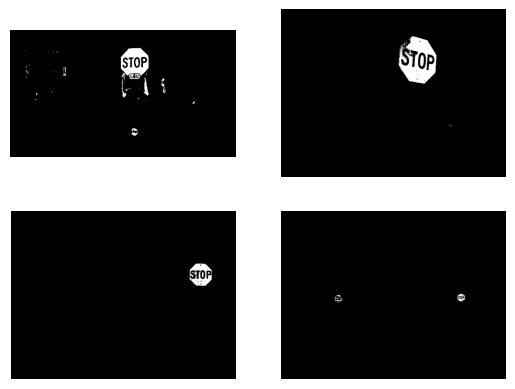

In [166]:
## TODO
chosen_images = stopsigns[12:16]
image1 = cv2.circle(chosen_images[3],(430, 82), 2, (255,255,0), 2)
lower_bound = np.array([100, 150, 80])
upper_bound = np.array([180, 255, 202])
color = (chosen_images[3])[82, 430]
print('bgr:', color)
hsv_col = cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_BGR2HSV)
print('hsv: ', hsv_col)
masked_stopsigns = []
for img in chosen_images:
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    stop_sign = cv2.inRange(hsv_img, lower_bound, upper_bound)
    # resized_stop_sign = cv2.resize(stop_sign, (img.shape[1], img.shape[0]))
    masked_stopsigns.append(stop_sign)
# axi = plt.imshow(image1, cmap = 'gray')
fig, ax = plt.subplots(ncols = 2, nrows = 2)
for a, i in zip(ax.flatten(), masked_stopsigns):
    a.axis('off')
    a.imshow(i, cmap = 'gray')
plt.show()

## Bounding boxes

Adding bounding box rectangles to images:

https://stackoverflow.com/a/37437395

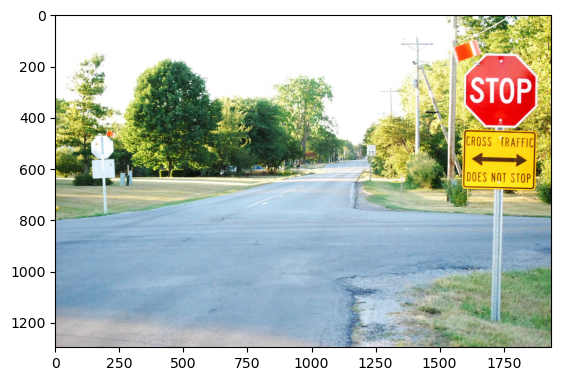

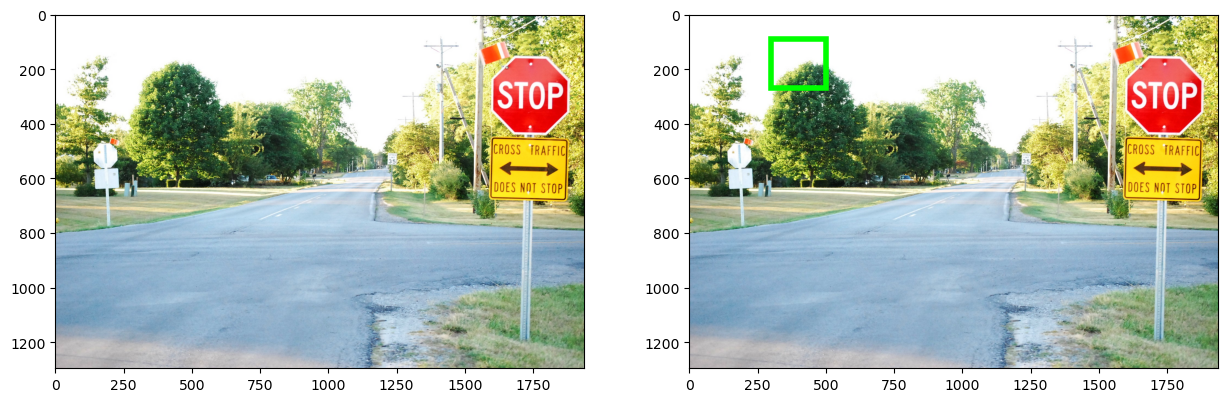

In [104]:
# plot an image on both the left and right
fig,ax = plt.subplots(ncols=2)
fig.set_size_inches(15,10)
ax[0].imshow(cv2.cvtColor(stopsigns[0], cv2.COLOR_BGR2RGB));
ax[1].imshow(cv2.cvtColor(stopsigns[0], cv2.COLOR_BGR2RGB));

# Define a bounding box:
bbox = Rectangle(xy=(300,90), width=200, height=180, linewidth=4, edgecolor='lime', facecolor='none')

# add the bounding box to the image on the right
ax[1].add_patch(bbox);
plt.show()


## Exercise 5

Choose a different image from your dataset. Manually define a bounding box around the stop sign in that image, using `Rectangle`.

What direction is positive X in? What direction is positive y in? Hint: think back to the Linear Regression exercise.

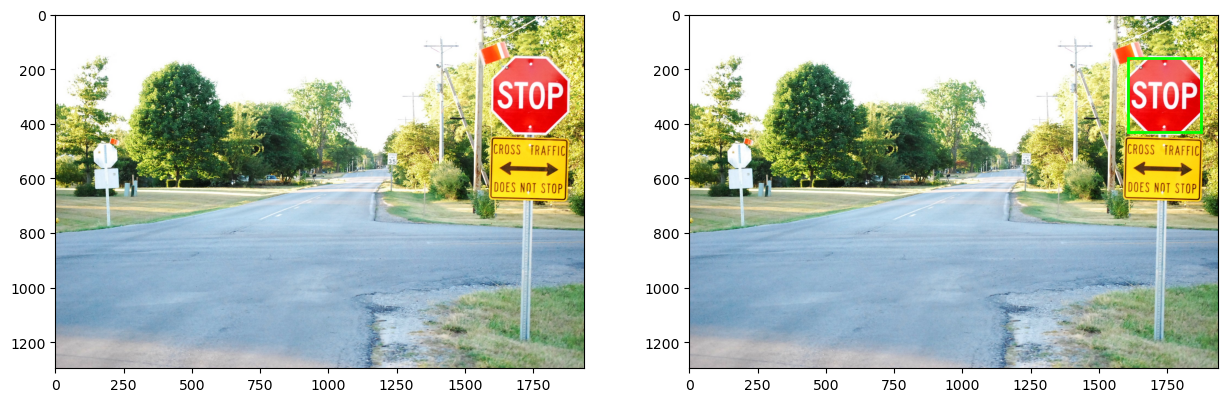

In [116]:
## TODO
sign_to_box = chosen_images[1]
rectangle = Rectangle(xy = (1605,160), width = 270, height = 270, angle=0, linewidth = 2, edgecolor = 'lime', facecolor = 'none')
rgb_im = cv2.cvtColor(stopsigns[0], cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(ncols = 2)
ax[0].imshow(rgb_im)
ax[1].imshow(rgb_im)
ax[1].add_patch(rectangle);
fig.set_size_inches(15,10)
plt.show()

## Exercise 6: Combining masking and morphology

For the four images you selected in Exercise 2, choose a colorspace and channel that you believe will work best for isolating stop signs.

1. Mask the five images using a narrow range of values in that channel.
2. Run erosion and dilation on the mask to reduce the amount of noise. What kernel sizes work best? If you want to run erosion immediately followed by dilation for the same kernel size, you can use `opening`:

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

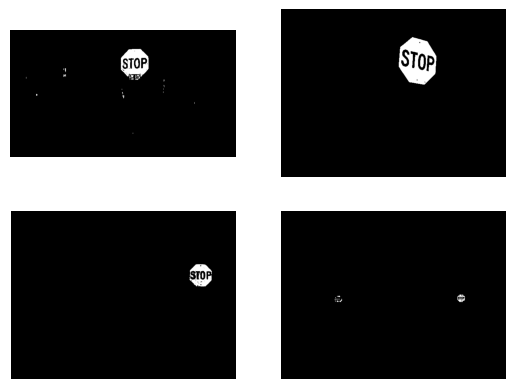

In [179]:
## TODO
chosen_images = stopsigns[12:16]
kernel = (5,5)
# lower_bound = np.array([70, 120, 0])
# upper_bound = np.array([180, 255, 255])
lower_bound = np.array([100, 150, 80])
upper_bound = np.array([180, 255, 255])
lower_bound2 = np.array([100, 150, 80])
upper_bound2 = np.array([180, 255, 140])
masked_and_filtered = []
for n, img in enumerate(chosen_images):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    if n == 0:
        stop_sign = cv2.inRange(hsv_img, lower_bound2, upper_bound2)
    else:
        stop_sign = cv2.inRange(hsv_img, lower_bound, upper_bound)
    altered = cv2.erode(stop_sign, kernel, iterations = 3)
    altered = cv2.dilate(altered, kernel, iterations = 3)
    # altered = cv2.morphologyEx(stop_sign, cv2.MORPH_OPEN, kernel)
    masked_and_filtered.append(altered)
# axi = plt.imshow(image1, cmap = 'gray')
fig, ax = plt.subplots(ncols = 2, nrows = 2)
for a, i in zip(ax.flatten(), masked_and_filtered):
    a.axis('off')
    a.imshow(i, cmap = 'gray')
plt.show()

## Exercise 7 - Compare with your team mates
Some images will have a lot of "noise" - in other words, for any choice of color channel, and any two values for `inRange` which mask stop sign pixels, a lot of pixels which don't come from the stop sign will also be included by the filter. What causes this? Which images are most prone to noise? What's significantly different about those images compared to the others?

In [ ]:
## TODO
# Images which have large areas of red in similar shades to the stop sign are more prone to noise as these areas will be registered into the inRange function

## When you are done:


1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch Goal: Combining Linear Regression and Color Segmentation

A lot of the above images have solid white lines or solid yellow lines, due to traffic lane markings. A lot of the images also have solid black lines (telephone poles), and solid green lines (the pole of the stop sign).

1. Choose some images that contain lines (at least 5). 
2. For each image, find a good color threshold which can mask the line or lines out.
3. Add in erosion, dilation, opening, or other morphological operations to improve the quality of the mask.
4. For each image, use OpenCV's linear regression function `cv2.fitLine` to plot the line of best fit from your results in the previous step.

See the following tutorial for `cv2.fitLine`: https://docs.opencv.org/3.4.1/dd/d49/tutorial_py_contour_features.html